In [ ]:
import os
import shutil
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from pathlib import Path
import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam

: 

In [ ]:
train = Path(r'C:\Users\ST-0010\Music\CAHET MCA\SKIN DISEASES\Skin Cancer\Train')
for folder in os.listdir(train):
    list_of_elements = os.listdir(os.path.join(train, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of Images: {len(list_of_elements)}\n')
    print()

Folder: akiec

Number of Images: 328


Folder: bcc

Number of Images: 515


Folder: bkl

Number of Images: 1100


Folder: df

Number of Images: 116


Folder: mel

Number of Images: 1113


Folder: not_skin_cancer

Number of Images: 93


Folder: nv

Number of Images: 2499


Folder: vasc

Number of Images: 142




In [ ]:
akiec = train/'akiec'
bcc= train/'bcc'
bkl = train/'bkl'
df = train/'df'
mel = train/'mel'
nv = train/'nv'
vasc = train/'vasc'
not_skin_cancer = train/'not_skin_cancer'

In [ ]:
def plot_images(item_dir, num_images=25):
    all_item_files = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_files][:num_images]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx + 1)
        img = plt.imread(img_path)
        #print(img_path)
        i=img_path.split("\\")
        #print(i[-2])
        plt.title(i[-2])
        plt.imshow(img)

    plt.tight_layout()

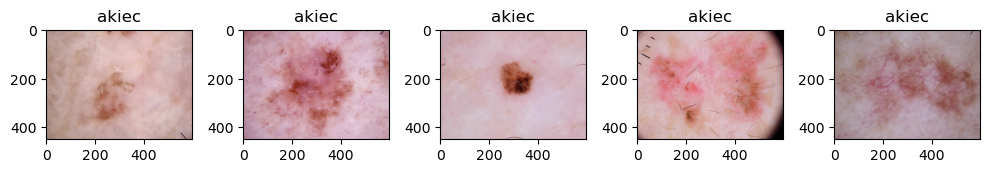

In [ ]:
plot_images(akiec,5)

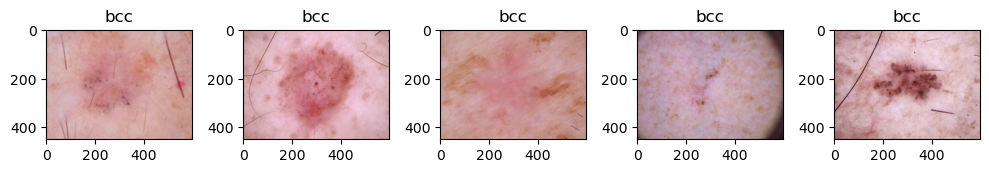

In [ ]:
plot_images(bcc,5)

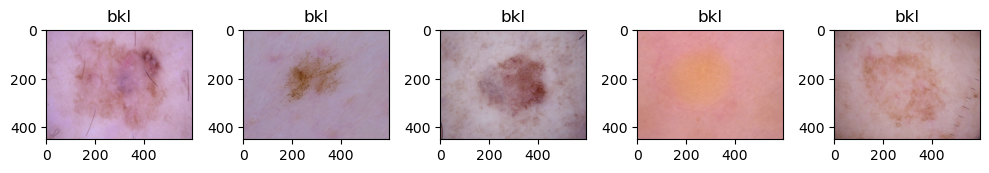

In [ ]:
plot_images(bkl,5)

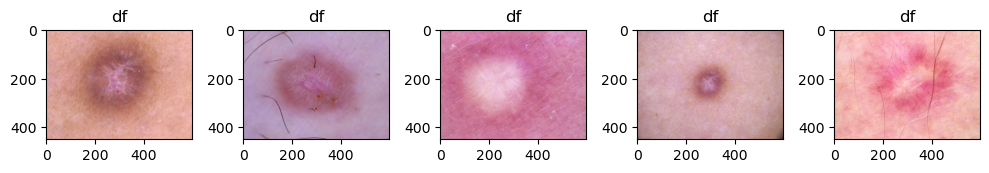

In [ ]:
plot_images(df,5)

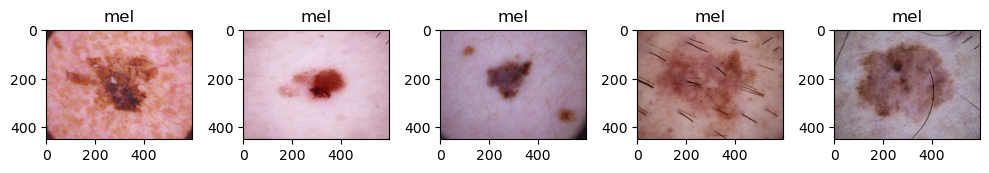

In [ ]:
plot_images(mel,5)

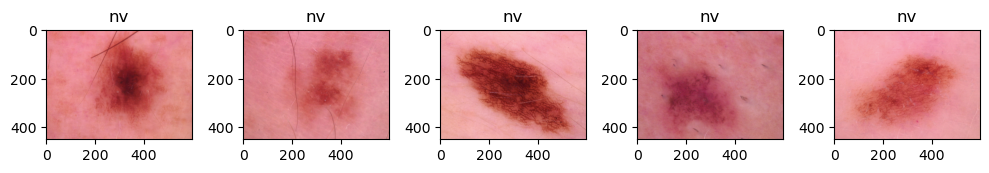

In [ ]:
plot_images(nv,5)

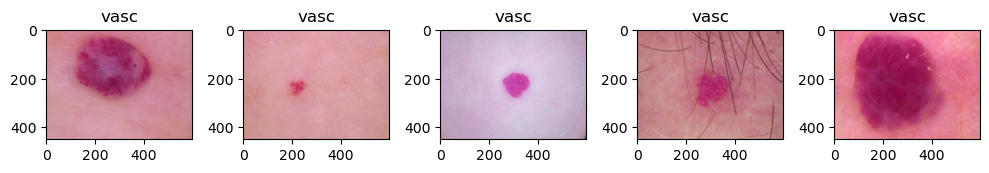

In [ ]:
plot_images(vasc,5)

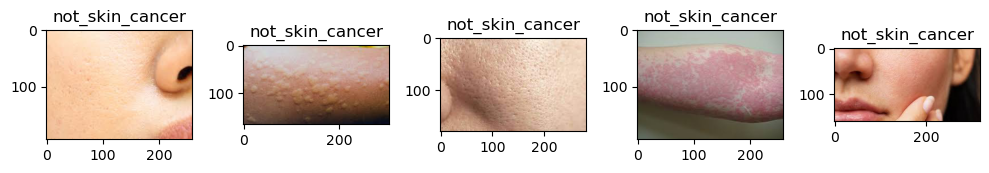

In [ ]:
plot_images(not_skin_cancer,5)

In [ ]:
# Collect images and labels
train_data = []
train_labels = []

def process_case(case_dir, label):
    for img_path in case_dir.glob('*.jpg'):
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (48, 48))
        if img.shape[2] == 1:
            img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        train_data.append(img)
        train_labels.append(label)

process_case(akiec, 'Akiec')
process_case(bcc, 'Bcc')
process_case(bkl, 'Bkl')
process_case(df, 'Df')
process_case(mel, 'Mel')
process_case(nv, 'Nv')
process_case(vasc, 'Vasc')
process_case(not_skin_cancer, 'not_skin_cancer')

# Convert the lists into numpy arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

print("Total number of samples: ", train_data.shape[0])
print("Shape of train_data:", train_data.shape)
print("Shape of train_labels:", train_labels.shape)


Total number of samples:  5902
Shape of train_data: (5902, 48, 48, 3)
Shape of train_labels: (5902,)


In [ ]:
#train_data[1]

In [ ]:
train_labels1 = pd.DataFrame(train_labels,columns=['label'],index=None)
train_labels1.head()

,label
0,Akiec
1,Akiec
2,Akiec
3,Akiec
4,Akiec


In [ ]:
train_labels1['label'].unique()

array(['Akiec', 'Bcc', 'Bkl', 'Df', 'Mel', 'Nv', 'Vasc',
       'not_skin_cancer'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
train_labels1['label_encoded'] = label_encoder.fit_transform(train_labels1['label'])

# Display unique labels and their encoded values
print("Unique Labels:", train_labels1['label'].unique())
print("Encoded Labels:", train_labels1['label_encoded'].unique())


Unique Labels: ['Akiec' 'Bcc' 'Bkl' 'Df' 'Mel' 'Nv' 'Vasc' 'not_skin_cancer']
Encoded Labels: [0 1 2 3 4 5 6 7]


In [ ]:
#train_labels1['label_encoded']=train_labels1['label'].map({'Akiec':0,'Bcc':1,'Bkl':2,'Df':3,'Mel':4,'Nv':5,'Vasc':6})

In [ ]:
train_labels1

,label,label_encoded
0,Akiec,0
1,Akiec,0
2,Akiec,0
3,Akiec,0
4,Akiec,0
...,...,...
5897,not_skin_cancer,7
5898,not_skin_cancer,7
5899,not_skin_cancer,7
5900,not_skin_cancer,7


In [ ]:
train_labels1["label_encoded"]

0       0
1       0
2       0
3       0
4       0
       ..
5897    7
5898    7
5899    7
5900    7
5901    7
Name: label_encoded, Length: 5902, dtype: int32

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
train_rows=len(train_data)
train_data = train_data.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data, train_labels1["label_encoded"])

print("Shape of oversampled train_data:", train_data2.shape)
print("Shape of oversampled train_labels:", train_labels2.shape)

Shape of oversampled train_data: (19992, 6912)
Shape of oversampled train_labels: (19992,)


In [ ]:
train_labels2.value_counts()

label_encoded
0    2499
1    2499
2    2499
3    2499
4    2499
5    2499
6    2499
7    2499
Name: count, dtype: int64

In [ ]:
train_data2 =train_data2.reshape(-1,48,48,3)

In [ ]:
train_data2.shape

(19992, 48, 48, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data2,train_labels2, test_size=0.3, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
Total params: 53904 (210.56 KB)
Trainable params: 53904 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(264, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))

model.add(layers.Dense(8))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), epochs=20, validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/20
438/438 [==============================] - 47s 98ms/step - loss: 0.2561 - accuracy: 0.9076 - val_loss: 0.5226 - val_accuracy: 0.8366
Epoch 2/20
438/438 [==============================] - 42s 97ms/step - loss: 0.2258 - accuracy: 0.9206 - val_loss: 0.3369 - val_accuracy: 0.8835
Epoch 3/20
438/438 [==============================] - 42s 95ms/step - loss: 0.1937 - accuracy: 0.9327 - val_loss: 0.3184 - val_accuracy: 0.8975
Epoch 4/20
438/438 [==============================] - 43s 97ms/step - loss: 0.1798 - accuracy: 0.9350 - val_loss: 0.2956 - val_accuracy: 0.9048
Epoch 5/20
438/438 [==============================] - 43s 99ms/step - loss: 0.1595 - accuracy: 0.9427 - val_loss: 0.3018 - val_accuracy: 0.9065
Epoch 6/20
438/438 [==============================] - 45s 103ms/step - loss: 0.1728 - accuracy: 0.9408 - val_loss: 0.3653 - val_accuracy: 0.8818
Epoch 7/20
438/438 [==============================] - 45s 103ms/step - loss: 0.1564 - accuracy: 0.9441 - val_loss: 0.2819 - val_accurac

In [ ]:
pred = model.predict(X_test)

188/188 [==============================] - 3s 14ms/step


In [ ]:
y_pred = np.argmax(pred, axis = 1)
y_pred

array([1, 0, 2, ..., 2, 4, 5], dtype=int64)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[733,  12,   3,   0,   0,   0,   0,   1],
       [ 11, 726,   6,   2,   2,   2,   8,   0],
       [ 17,  21, 606,   2,  30,  31,   0,   2],
       [  2,   1,   0, 774,   0,   0,   0,   0],
       [ 13,  15,  60,   0, 655,  41,   3,   3],
       [  8,  26,  57,   2,  76, 572,   1,   3],
       [  0,   1,   0,   0,   1,   0, 744,   0],
       [  0,   0,   0,   0,   0,   0,   0, 725]], dtype=int64)

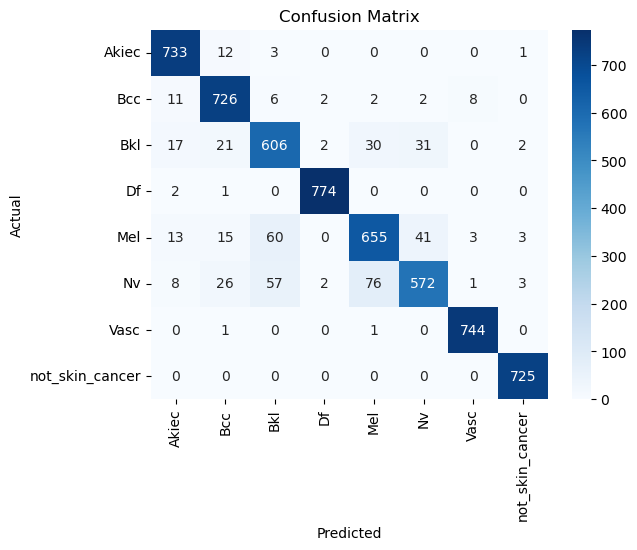

In [ ]:
# Assuming classes are the label names
# Example class names
classes =label_encoder.classes_

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred,target_names=classes)
print(report)

                 precision    recall  f1-score   support

          Akiec       0.93      0.98      0.96       749
            Bcc       0.91      0.96      0.93       757
            Bkl       0.83      0.85      0.84       709
             Df       0.99      1.00      0.99       777
            Mel       0.86      0.83      0.84       790
             Nv       0.89      0.77      0.82       745
           Vasc       0.98      1.00      0.99       746
not_skin_cancer       0.99      1.00      0.99       725

       accuracy                           0.92      5998
      macro avg       0.92      0.92      0.92      5998
   weighted avg       0.92      0.92      0.92      5998



In [ ]:
model.save(r'C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\CNN_skin-cancer.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(48,48,3))

In [ ]:
vgg.trainable = False
model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(8, activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.001)
#optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_1.compile(optimizer = opt,loss="categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your target data
# One-hot encode target data
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [ ]:
his2= model_1.fit(X_train, y_train_encoded, epochs = 20, validation_data = (X_test,y_test_encoded),batch_size = 32)

Epoch 1/20
438/438 [==============================] - 116s 262ms/step - loss: 1.3869 - accuracy: 0.5022 - val_loss: 1.1335 - val_accuracy: 0.6110
Epoch 2/20
438/438 [==============================] - 114s 260ms/step - loss: 1.0945 - accuracy: 0.6043 - val_loss: 1.0306 - val_accuracy: 0.6295
Epoch 3/20
438/438 [==============================] - 115s 262ms/step - loss: 1.0025 - accuracy: 0.6346 - val_loss: 1.0019 - val_accuracy: 0.6254
Epoch 4/20
438/438 [==============================] - 115s 264ms/step - loss: 0.9388 - accuracy: 0.6556 - val_loss: 0.9156 - val_accuracy: 0.6664
Epoch 5/20
438/438 [==============================] - 115s 263ms/step - loss: 0.8967 - accuracy: 0.6724 - val_loss: 0.8872 - val_accuracy: 0.6861
Epoch 6/20
438/438 [==============================] - 114s 261ms/step - loss: 0.8602 - accuracy: 0.6864 - val_loss: 0.8435 - val_accuracy: 0.6961
Epoch 7/20
438/438 [==============================] - 114s 261ms/step - loss: 0.8315 - accuracy: 0.6984 - val_loss: 0.8202 -

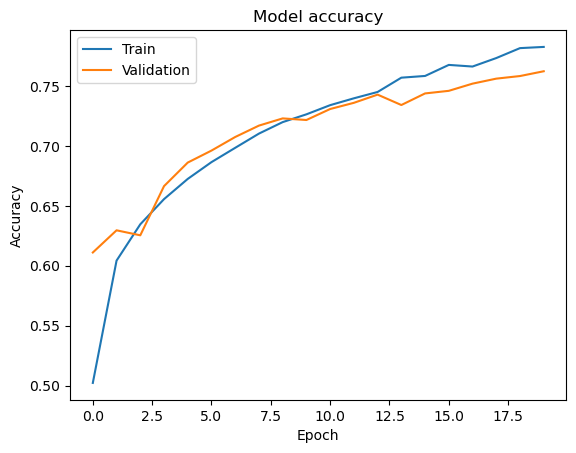

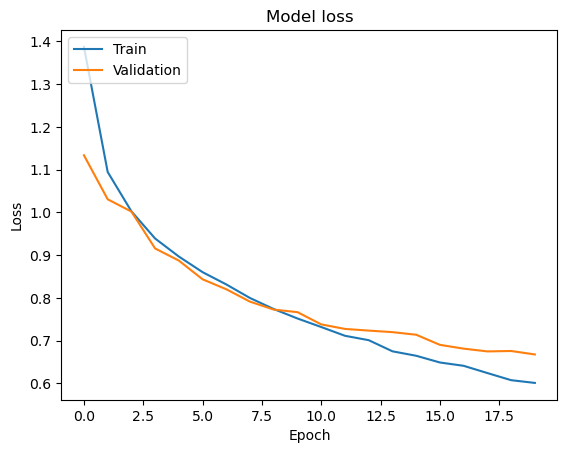

In [ ]:
import matplotlib.pyplot as plt

# Assuming his2 is the history object returned by model.fit()

# Plot training & validation accuracy values
plt.plot(his2.history['accuracy'])
plt.plot(his2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his2.history['loss'])
plt.plot(his2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
vgm = model_1.predict(X_test)

188/188 [==============================] - 35s 184ms/step


In [ ]:
y_predvgm = np.argmax(vgm, axis = 1)
y_predvgm

array([1, 0, 4, ..., 0, 4, 5], dtype=int64)

In [ ]:
cm = confusion_matrix(y_test, y_predvgm)
cm

array([[585,  94,  25,  15,   8,  11,   4,   7],
       [ 86, 571,  18,  39,  11,   6,  13,  13],
       [126,  91, 296,  25,  77,  72,  16,   6],
       [ 25,  40,   6, 691,   1,   7,   6,   1],
       [107,  43,  93,  16, 438,  73,  20,   0],
       [ 26,  35,  40,  19,  60, 534,  27,   4],
       [  1,   5,   0,   3,   1,   1, 735,   0],
       [  1,   1,   1,   0,   0,   0,   0, 722]], dtype=int64)

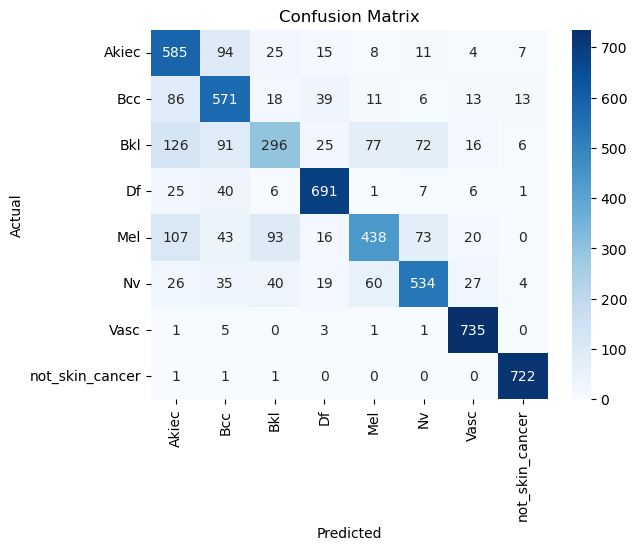

In [ ]:
# Assuming classes are the label names
# Example class names
classes =label_encoder.classes_

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show plot
plt.show()

In [ ]:
report = classification_report(y_test, y_predvgm,target_names=classes)
print(report)

                 precision    recall  f1-score   support

          Akiec       0.61      0.78      0.69       749
            Bcc       0.65      0.75      0.70       757
            Bkl       0.62      0.42      0.50       709
             Df       0.86      0.89      0.87       777
            Mel       0.73      0.55      0.63       790
             Nv       0.76      0.72      0.74       745
           Vasc       0.90      0.99      0.94       746
not_skin_cancer       0.96      1.00      0.98       725

       accuracy                           0.76      5998
      macro avg       0.76      0.76      0.75      5998
   weighted avg       0.76      0.76      0.76      5998



In [ ]:
model_1.save(r'C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\vgg_skin-cancer.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# DenseNet121

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [ ]:
den= DenseNet121(input_shape=(48,48,3),weights='imagenet',include_top=False)

In [ ]:
den.trainable = True

set_trainable = False

for layer in den.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in den.layers[:]:
    if ('bn' in layer.name):
        trainable = False

In [ ]:
x = Flatten()(den.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(8,activation='softmax')(x)

In [ ]:
from keras.models import Model
from keras.layers import Input

# Assuming 'prediction' is your output tensor
# Define your model
model2 = Model(inputs=den.input, outputs=prediction)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 54, 54, 3)            0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 24, 24, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1/conv[0][0]']      

 conv2_block4_0_bn (BatchNo  (None, 12, 12, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 12, 12, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 12, 12, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 12, 12, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 6, 6, 32)             36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 6, 6, 160)            0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 6, 6, 32)             36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 6, 6, 288)            0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 6, 6, 32)             36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 3, 3, 256)            0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 3, 3, 256)            1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 3, 3, 128)            32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 3, 3, 384)            0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 3, 3, 384)            1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 3, 3, 384)            0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 3, 3, 512)            0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 3, 3, 512)            2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 3, 3, 512)            0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 3, 3, 32)             36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 3, 3, 640)            0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 3, 3, 640)            2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 3, 3, 640)            0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 3, 3, 32)             36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 3, 3, 768)            0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 3, 3, 768)            3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 3, 3, 32)             36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 3, 3, 896)            0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 3, 3, 896)            3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 3, 3, 128)            0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 3, 3, 32)             36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 3, 3, 1024)           0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 3, 3, 1024)           4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 1, 1, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 1, 1, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 1, 1, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 1, 1, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 1, 1, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 1, 1, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 1, 1, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 1, 1, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 1, 1, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 1, 1, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 1, 1, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 1, 1, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 1, 1, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your callbacks
EarlyStop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)
Checkpoint = ModelCheckpoint(monitor='val_accuracy', filepath=r'C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\DenDE-model.h5', verbose=1, save_best_only=True, mode='auto')
callbacks = [EarlyStop, Checkpoint]

# Define your optimizer
adam = keras.optimizers.Adam(learning_rate=0.00001)

# Compile your model
model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
his3= model2.fit(X_train, y_train_encoded, epochs = 40,validation_data = (X_test,y_test_encoded), callbacks=callbacks ,batch_size =32,shuffle=True)

Epoch 1/40
437/438 [============================>.] - ETA: 0s - loss: 0.6709 - accuracy: 0.7555
Epoch 1: val_accuracy improved from 0.77809 to 0.77926, saving model to C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\DenDE-model.h5
438/438 [==============================] - 87s 199ms/step - loss: 0.6711 - accuracy: 0.7555 - val_loss: 0.6031 - val_accuracy: 0.7793
Epoch 2/40
437/438 [============================>.] - ETA: 0s - loss: 0.6671 - accuracy: 0.7558
Epoch 2: val_accuracy improved from 0.77926 to 0.78093, saving model to C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\DenDE-model.h5
438/438 [==============================] - 78s 179ms/step - loss: 0.6672 - accuracy: 0.7557 - val_loss: 0.5971 - val_accuracy: 0.7809
Epoch 3/40
438/438 [==============================] - ETA: 0s - loss: 0.6534 - accuracy: 0.7608
Epoch 3: val_accuracy improved from 0.78093 to 0.78326, saving model to C:\Users\ST-0010\Music\CHA

438/438 [==============================] - 89s 203ms/step - loss: 0.5190 - accuracy: 0.8103 - val_loss: 0.4989 - val_accuracy: 0.8218
Epoch 22/40
438/438 [==============================] - ETA: 0s - loss: 0.5059 - accuracy: 0.8187
Epoch 22: val_accuracy did not improve from 0.82177
438/438 [==============================] - 85s 193ms/step - loss: 0.5059 - accuracy: 0.8187 - val_loss: 0.4969 - val_accuracy: 0.8204
Epoch 23/40
438/438 [==============================] - ETA: 0s - loss: 0.5113 - accuracy: 0.8141
Epoch 23: val_accuracy improved from 0.82177 to 0.82344, saving model to C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\DenDE-model.h5
438/438 [==============================] - 89s 203ms/step - loss: 0.5113 - accuracy: 0.8141 - val_loss: 0.4918 - val_accuracy: 0.8234
Epoch 24/40
437/438 [============================>.] - ETA: 0s - loss: 0.4976 - accuracy: 0.8161
Epoch 24: val_accuracy did not improve from 0.82344
438/438 [====================

In [ ]:
Model_evaluation = model2.evaluate(X_test,y_test_encoded)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.2f} %")

188/188 [==============================] - 24s 127ms/step - loss: 0.4398 - accuracy: 0.8448
%
Accuracy: 84.48 %


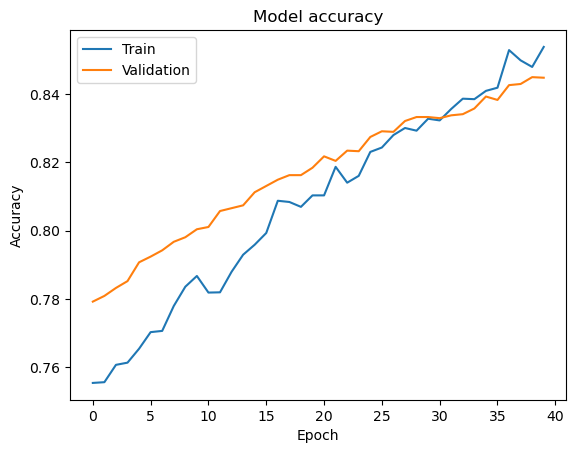

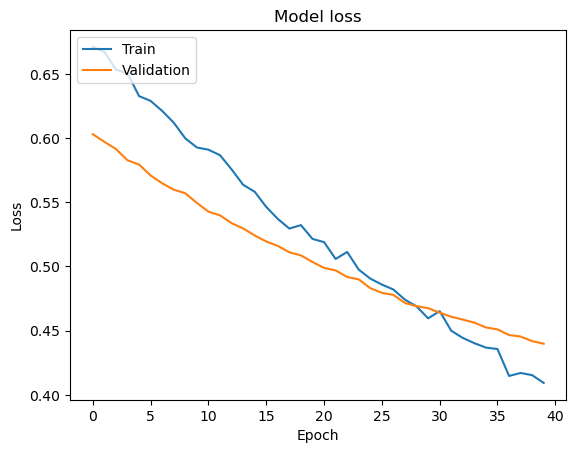

In [ ]:
import matplotlib.pyplot as plt

# Assuming his2 is the history object returned by model.fit()

# Plot training & validation accuracy values
plt.plot(his3.history['accuracy'])
plt.plot(his3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his3.history['loss'])
plt.plot(his3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Get predictions on the test set
y_pred = model2.predict(X_test)

# Convert one-hot encoded labels back to original labels if needed
# For example, if y_test_encoded is one-hot encoded, you might want to convert it back to categorical labels

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix:")
print(cm)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred.argmax(axis=1)))

188/188 [==============================] - 27s 132ms/step
Confusion Matrix:
[[676  32  16   7  15   2   0   1]
 [ 57 641  27   4  16   4   4   4]
 [ 48  30 453   7 114  54   1   2]
 [ 10   4   0 762   0   1   0   0]
 [ 37  25 124   7 519  72   5   1]
 [ 17  18  54   7  87 550   9   3]
 [  0   0   1   1   0   0 744   0]
 [  0   2   1   0   0   0   0 722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       749
           1       0.85      0.85      0.85       757
           2       0.67      0.64      0.65       709
           3       0.96      0.98      0.97       777
           4       0.69      0.66      0.67       790
           5       0.81      0.74      0.77       745
           6       0.98      1.00      0.99       746
           7       0.98      1.00      0.99       725

    accuracy                           0.84      5998
   macro avg       0.84      0.84      0.84      5998
weighted avg       0.84 

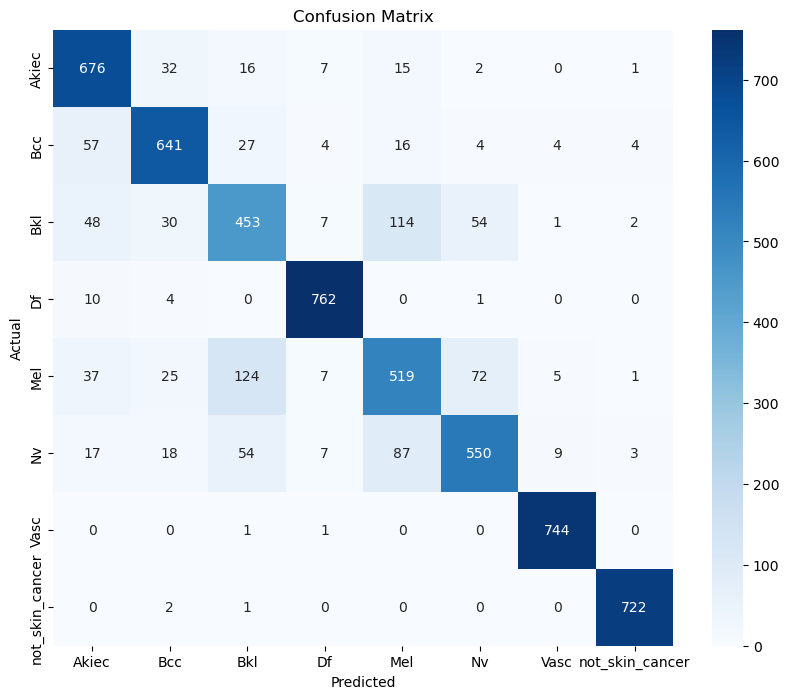

Classification Report:
                 precision    recall  f1-score   support

          Akiec       0.80      0.90      0.85       749
            Bcc       0.85      0.85      0.85       757
            Bkl       0.67      0.64      0.65       709
             Df       0.96      0.98      0.97       777
            Mel       0.69      0.66      0.67       790
             Nv       0.81      0.74      0.77       745
           Vasc       0.98      1.00      0.99       746
not_skin_cancer       0.98      1.00      0.99       725

       accuracy                           0.84      5998
      macro avg       0.84      0.84      0.84      5998
   weighted avg       0.84      0.84      0.84      5998



In [ ]:
# Plot confusion matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_encoded.argmax(axis=1), y_pred.argmax(axis=1), target_names=classes))

In [ ]:
model2.save(r'C:\Users\ST-0010\Music\CHANDRU\ITDL12-Skin Cancer using Deep Learning\NEW PICKLE FILE\den_skin-cancer.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
